
## Exercice 3 : maximum de vraisemblance 2

On veut quantifier le lien entre deux variables pour lesquelles une relation linéaire semble exister, mais le bruit qui effecte les observations sur la deuxième variable n'est clairement pas Gaussien.

Nous allons essayer de trouver la relation entre les variables a l'aide d'un modèle de régression linéaire dont les paramètres seront optimises en maximisant une vraissemblance plutôt qu'en minimisant une erreur au carré.


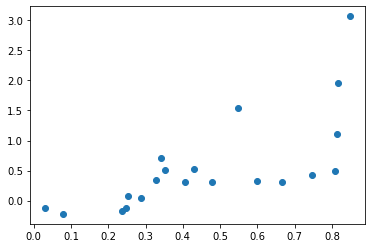

In [1]:
import numpy as np
import matplotlib.pyplot as plt


MyData=np.genfromtxt('QuantifiedDataExo1_3.csv')

plt.scatter(MyData[:,0],MyData[:,1])
plt.show()



### <span style="color:blue">QUESTION 3.1 :</span> 

Essayez de résoudre le problème à l'aide de l'algorithme de régression linéaire de scikit-learn

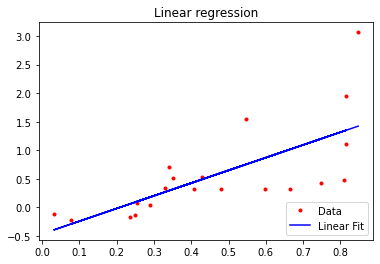

In [2]:
X=MyData[:,0]
Y=MyData[:,1]

import sklearn
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X[:, np.newaxis], Y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

# representation du resultat
fig = plt.figure()
plt.plot(X,Y, 'r.')
plt.plot(X, lr.predict(X[:, np.newaxis]), 'b-')
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Linear regression')
plt.show()

On peut constater que la pente de la courbe est légèrement trop forte. Cette mauvaise estimation est dûe à trois observations à droite de la figure qui font un effet levier. La régression linéaire minimise l'erreur d'approximation au carré sur les observations d'apprentissage. De manière sous-jacente cela se base sur l'hypothèse que les erreurs d'approximation suivent une loi normale centrée (et pas forcement réduite). Hors, les erreurs d'approximation autour d'un modèle linéaire sont clairement non symétriques ici. Nous allons alors résoudre le problème au sens du maximum de vraisemblance.

### <span style="color:blue">QUESTION 3.2 :</span> 

On va modéliser le problème sous la forme :

$ypred_i = a * x_i +b \,,\, \forall i = 1, \ldots, n$
et $err_i= ypred_i-y_i$

où les $x_i$ et $y_i$ sont les donnees d'apprentissage pour les observations $i$ dans $[1, 2, ..., n]$, et $ypred_i$ approche $y_i$. Les deux parametres du modele lineaire que l'on cherche a estimer sont $a$ et $b$. Afin de résoudre le probleme, on va alors repondre aux sous-questions suivantes :

#### <span style="color:blue">QUESTION 3.2.1 :</span> 
Codez une fonction qui calcul les erreurs d'approximations pour toutes les observations de $X$ et $Y$ avec un $a$ et un $b$ specifiques.

#### <span style="color:blue">QUESTION 3.2.2 :</span> 

Codez une fonction qui calcule la log-vraisemblance (ou la vraisemblance) de parametres pour lesquel l'erreur d'approximation suit une loi normale centree d'ecart type sigma. On donnera la valeur par defaut sigma=2

#### <span style="color:blue">QUESTION 3.2.3 :</span> 

Codez une fonction qui calcule la log-vraisemblance (ou la vraisemblance) de parametres pour lesquel l'erreur d'approximation suit une loi de chi2. On fixera par defaut le nombre de degres de liberte ddl=3 et l'echelle de la loi (scale) a 0.4. On fera très attention au fait que la densite de probabilite d'une valeur negative sera egale a zero avec la loi du chi2.

#### <span style="color:blue">QUESTION 3.2.4 :</span> 

Utilisez les fonctions de calcul de la (log-)vraisemblance pour trouver une relation lineaire qui semble raisonable, i.e. pour trouver les parametres a et b les plus vraisemblables. On pourra eventuellement s'aider d'une representation du nuage de points qui represente le 'score' attribue a chaque observation.


In [62]:
#CODE 2.1
def compute_errors(X,Y,theta,verbose=False):
    """
    returns a vector having the same size as X or Y which represents the errors
    with a 1D linear model of parameters theta=[a,b]
    """
    errors = Y - ( theta[1] + theta[0]*X)
    if verbose:
        plt.scatter(X,Y,c=errors)
        plt.colorbar()
    return errors


In [24]:

#CODE 2.2

from scipy.stats import norm

def likelihood_normal(X,Y,theta,sigma=2.):
    """
    returns the log_likelihood of the 1D linear model with parameters theta=[a,b] and
    the errors following a normal law of std=sigma
    """

    errors=compute_errors(X,Y,theta)
    
    likelihood = np.sum(norm.logpdf(errors,scale=sigma))

    return likelihood



In [52]:
#CODE 2.3

from scipy.stats import chi2

def likelihood_chi2(X,Y,theta,dof=3,sc=0.4):
    """
    returns the log_likelihood of the 1D linear model with parameters theta=[a,b] and
    the errors following a chi2 law of dof degrees of freedom
    """

    errors=compute_errors(X,Y,theta)

    likelihood = np.sum(chi2.logpdf(errors[errors>0],df=dof,scale=sc))

    return likelihood



In [37]:
#CODE 2.4
a_values = np.linspace(-3,3,100)
b_values = np.linspace(-3,3,100)

a_normal = -3
b_normal = -3
l_normal_max = likelihood_normal(X,Y,[-3,-3],sigma=2.)

a_chi2 = -3
b_chi2 = -3
l_chi2_max = likelihood_chi2(X,Y,[-3,-3],dof=3,sc=0.4)

for a in a_values:
    for b in b_values:
        l_normal = likelihood_normal(X,Y,[a,b],sigma=2.)
        l_chi2 = likelihood_chi2(X,Y,[a,b],dof=3,sc=0.4)
        if l_normal > l_normal_max:
            l_normal_max = l_normal
            a_normal = a
            b_normal = b
        if l_chi2 > l_chi2_max:
            l_chi2_max = l_chi2
            a_chi2 = a
            b_chi2 = b

print(f"Normal : {a_normal} X + {b_normal} \n Log-likelihood : {l_normal_max} \n\n")
print(f"Normal : {a_chi2} X + {b_chi2} \n Log-likelihood : {l_chi2_max} \n\n")

Normal : 2.212121212121212 X + -0.4545454545454546 
 Log-likelihood : -33.0383998652955 


Normal : 3.0 X + 0.5757575757575757 
 Log-likelihood : -24.348542956928313 





### <span style="color:blue">QUESTION 3.3 :</span> 

Codez une fonction de descente de gradient pour apprendre les parametres optimaux du modele (a et b) avec les deux types de bruit consideres mais leurs parametres fixes aux valeurs par defaut.

Remarque: on **maximisera** idéalement la log-vraisemblance plutôt que la vraisemblance, ce qui est numeriquement plus efficace et conduit au même résultat.



-33.03846210745
[ 2.19728066 -0.4512013 ]
-0.5026478013647603


array([-0.97958289, -0.4110374 , -1.14263567, -1.30856134, -1.30306961,
       -1.18215362, -0.63525106, -0.75248152, -1.06000035, -1.48155719,
       -2.0882465 , -1.75455673, -1.91953807, -1.99655884, -1.37109139,
       -1.09677845, -1.47675009, -0.84885838, -1.39225727,  0.40000468])

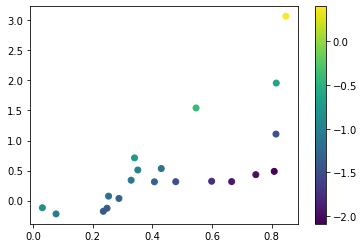

In [63]:

def MinusLikelihood_normal(X,Y,theta,sigma=2.):
    return -likelihood_normal(X,Y,theta,sigma=sigma)

def MinusLikelihood_chi2(X,Y,theta,dof=3,sc=0.4):
    return -likelihood_chi2(X,Y,theta,dof=dof,sc=sc)

#3.1: fonctions pour la descente de gradient

def Grad_function(f,X,Y,theta_loc,epsilon=1e-5):
    ApproxGrad = np.array([(f(X,Y,[theta_loc[0]+epsilon,theta_loc[1]])-f(X,Y,theta_loc))/epsilon,(f(X,Y,[theta_loc[0],theta_loc[1]+epsilon])-f(X,Y,theta_loc))/epsilon])
    return ApproxGrad

#descente de gradient avec alpha defini a la main

def grad_descent(funct,X,Y,theta_init,convspeedfactor=0.1,nbIterations=100):
    theta = theta_init
    for i in range(nbIterations):
        theta = theta - convspeedfactor*Grad_function(funct,X,Y,theta)

    print(-funct(X,Y,theta))
    return theta

print(grad_descent(MinusLikelihood_normal,X,Y,[2.2,0.45]))
theta_chi2 = grad_descent(MinusLikelihood_chi2,X,Y,[2.2,0.45])
compute_errors(X,Y,theta_chi2,True)


l'optimisation marche aussi, meme si il faut faire tres attention au choix du theta_init (la densite du chi2 est nulle pour les erreurs negatives)... par contre :
  -> la vraisemblance est de 10e-7 au lieu de 10e-15
  -> le modele lineaire colle mieux a la majorite des donnees et est moins sensible aux donnees visiblement aberrantes


On peut alors plus faire confiance a la pente calculee avec le bruit de type chi2 que le bruit gaussien, MAIS en etant clair sur le fait qu'on aura une tendance loin d'etre negligeable de s'eloigner regulierement du modele lineaire de maniere non-symetrique par rapport au modele.


In [ ]:
"""
#Remarque : Generation de donnees dans cet exercice :

import numpy as np
import matplotlib.pyplot as plt
n = 20
X = np.random.uniform(size=n)
y = 1.2*X[:] + np.random.chisquare(1.,size=n)*0.4-0.5

plt.plot(X[], y, 'r.')
plt.show()

MyData=np.concatenate((X.reshape(-1,1),y.reshape(-1,1)),axis=1)
np.savetxt('J18_E4_QuantifiedData.csv',MyData)
"""